In [ ]:
# Write a Dynamic Function for Derivative Calculation:

In [70]:
import sympy as sp

def dy_dx(expr_str, x):
    x_sym = sp.symbols('x')
    expr = sp.sympify(expr_str)
    derivative = sp.diff(expr, x_sym)
    dy_dx_func = sp.lambdify(x_sym, derivative, 'numpy')
    return dy_dx_func


In [ ]:
# Test the Derivative Function with a Quadratic Equation:

In [71]:
def test_derivative_function(expr_str, x_value):
    derivative_func = dy_dx(expr_str, sp.symbols('x'))

    # Print the result of testing the derivative function
    derivative_at_point = derivative_func(x_value)
    print(f"Derivative of {expr_str} at x={x_value} is: {derivative_at_point}")

# Test the derivative function with a quadratic equation
quadratic_equation = "2*x**2 - 4*x + 1"
test_point = 2.0
test_derivative_function(quadratic_equation, test_point)


Derivative of 2*x**2 - 4*x + 1 at x=2.0 is: 4.0


In [ ]:
# Plot the Graph of the Quadratic Equation:

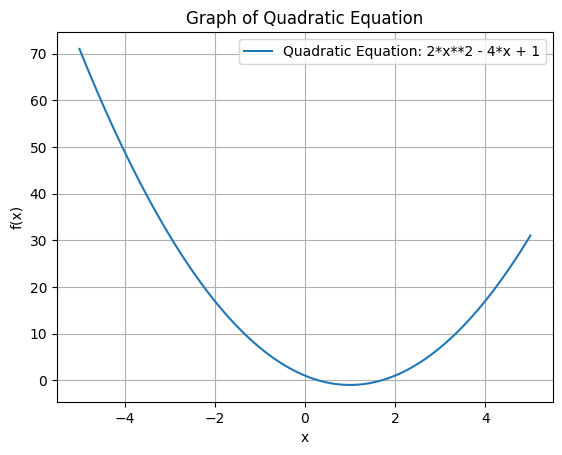

In [73]:
import numpy as np
import matplotlib.pyplot as plt

def plot_function(expr_str):
    x_vals = np.linspace(-5, 5, 100)
    y_vals = [eval(expr_str) for x in x_vals]

    plt.plot(x_vals, y_vals, label=f"Quadratic Equation: {expr_str}")
    plt.xlabel('x')
    plt.ylabel('f(x)')
    plt.title('Graph of Quadratic Equation')
    plt.legend()
    plt.grid(True)
    plt.show()

# Plot the quadratic equation
plot_function(quadratic_equation)


In [ ]:
# Identify Minima and Maxima:

In [74]:
def find_critical_points(expr_str, x_vals):
    func = dy_dx(expr_str, sp.symbols('x'))
    derivatives = [func(x) for x in x_vals]
    critical_points = [x_vals[i] for i in range(1, len(x_vals)-1) if derivatives[i-1] * derivatives[i+1] < 0]
    minima = [point for point in critical_points if func(point) > 0]
    maxima = [point for point in critical_points if func(point) < 0]
    return minima, maxima

# Find critical points for the quadratic equation
x_vals_for_critical_points = np.linspace(-5, 5, 100)
minima, maxima = find_critical_points(quadratic_equation, x_vals_for_critical_points)
print(f"Minima: {minima}")
print(f"Maxima: {maxima}")


Minima: [1.0606060606060606]
Maxima: [0.9595959595959593]


In [80]:
def find_global_extrema(expr_str, x_vals, minima, maxima):
    func = dy_dx(expr_str, sp.symbols('x'))
    global_minima = min(minima, key=lambda x: func(x))
    global_maxima = max(maxima, key=lambda x: func(x))
    return global_minima, global_maxima

# Find global minima and maxima for the quadratic equation
global_minima, global_maxima = find_global_extrema(quadratic_equation, x_vals_for_critical_points, minima, maxima)
print(f"Global Minima: ({global_minima}, {dy_dx(quadratic_equation, sp.symbols('x'))(global_minima)})")
print(f"Global Maxima: ({global_maxima}, {dy_dx(quadratic_equation, sp.symbols('x'))(global_maxima)})")


Global Minima: (1.0606060606060606, 0.2424242424242422)
Global Maxima: (0.9595959595959593, -0.16161616161616266)


In [ ]:
# Visualize the Global Minima and Maxima:

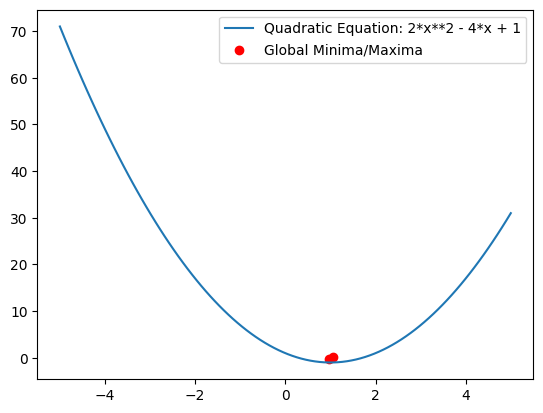

In [79]:
def visualize_extrema(expr_str, x_vals, minima, maxima, global_minima, global_maxima):
    func = dy_dx(expr_str, sp.symbols('x'))
    plt.plot(x_vals, [eval(expr_str) for x in x_vals], label=f"Quadratic Equation: {expr_str}")
    plt.scatter([global_minima, global_maxima], [func(x) for x in [global_minima, global_maxima]],
                color='red', marker='o', label='Global Minima/Maxima')
    plt.legend()
    plt.show()

# Visualize the global minima and maxima on the same graph
visualize_extrema(quadratic_equation, x_vals_for_critical_points, minima, maxima, global_minima, global_maxima)
